In [103]:
# -*- coding: utf-8 -*-
from imutils import perspective
from skimage.filters import threshold_local  
import cv2  
import imutils  
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
import pixellink

/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
util/plt.py:8: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/luoweimeng/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", li

Instructions for updating:
Please switch to tf.train.get_or_create_global_step
(768, 768)
train/ic17_whole/model.ckpt-200000
INFO:tensorflow:Restoring parameters from train/ic17_whole/model.ckpt-200000
('train/ic17_whole/model.ckpt-200000', 'Restore Success!')


In [4]:
pl = pixellink.pixelLinkDetector("/Users/luoweimeng/Documents/较符合要求的图片/louxia.jpeg")
# 输出bounding boxes, (x1, y1, x2, y2, x3, y3, x4, y4) 顺时针方向
pl.detect()

0.7
0.8


[array([  6,   4, 297,   4,   6,  42, 297,  42]),
 array([214, 156, 250, 156, 214, 175, 250, 175]),
 array([331, 348, 613, 348, 331, 363, 613, 363]),
 array([667, 364, 949, 364, 667, 379, 949, 379]),
 array([651, 460, 895, 460, 651, 475, 895, 475]),
 array([800, 492, 954, 492, 800, 507, 954, 507]),
 array([  6, 584, 239, 584,   6, 599, 239, 599]),
 array([ 827,  736, 1023,  736,  827,  759, 1023,  759])]

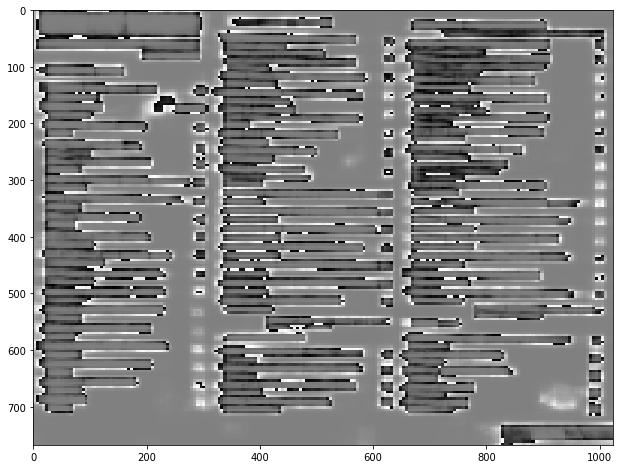

In [8]:
# 输出pixel score

pixel_score = pl.draw_pixel_score() * 256
pixel_score = pixel_score.astype('int8')
plt.imshow(pixel_score, cmap='gray')

# 输出pixel score

edged = cv2.Canny(np.uint8(pixel_score), 50, 256)   
# cv2.findContours(pixel_score_new.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if imutils.is_cv2() else cnts[1]

cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:]
rect = cv2.minAreaRect(np.concatenate(cnts))
image = cv2.imread("/Users/luoweimeng/Documents/较符合要求的图片/louxia.jpeg")
image, _ = pixellink.resize_im(image, scale=768, max_scale=1280)
orig = image.copy() 
points = cv2.boxPoints(rect)

rect[1][0] * rect[1][1] / (image.shape[0] * image.shape[1])

0

4297

0.9977223478878727

In [28]:
rect[1]

(1022.9998779296875, 766.9998779296875)

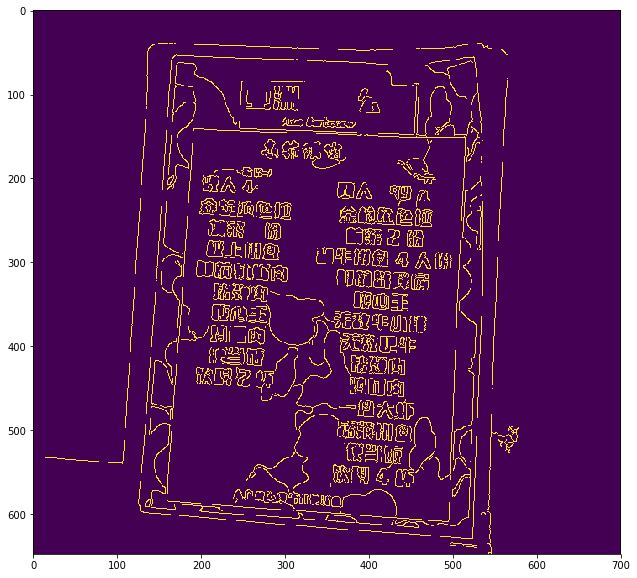

In [137]:
 # 边缘扫描  
# image = cv2.imread("/Users/chengcheng/Downloads/较符合要求的图片/13.jpg")
image = cv2.imread("/Users/luoweimeng/Documents/较符合要求的图片/9.jpg")

# ratio = image.shape[0] / 500.0                                 # 比例  
orig = image.copy()  
# image = imutils.resize(image, height = 500)  
 
# 灰度转换及边缘查找  
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)  
edged = cv2.Canny(gray, 5, 200)                               # 边缘检测  
plt.imshow(edged)

------> [[[399 439]]

 [[399 457]]

 [[418 458]]

 [[419 440]]]
rect--> ((408.5498962402344, 448.50250244140625), (18.027481079101562, 20.024986267089844), -87.1375961303711)
screenCnt [[[399 439]]

 [[399 457]]

 [[418 458]]

 [[419 440]]]


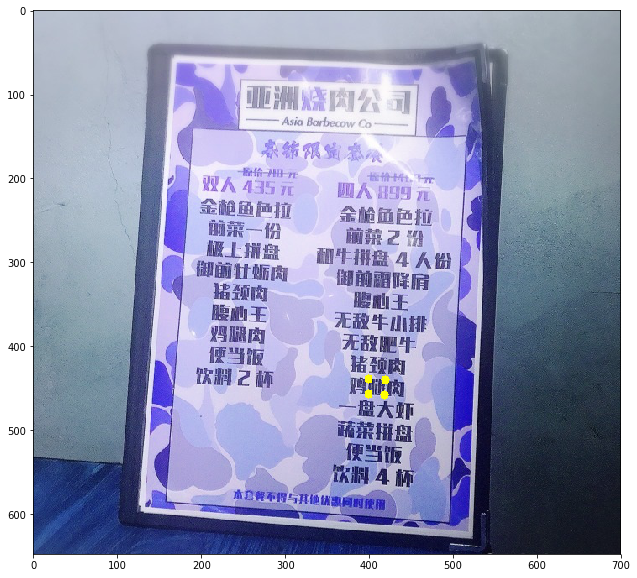

In [138]:
# 只保留轮廓  
cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE) #通过边缘图像找到轮廓
cnts = cnts[0] if imutils.is_cv2() else cnts[1]                # 用以区分OpenCV2.4和OpenCV3  
cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5] # 保留前5个最大轮廓  

# print "cnts-->", type(cnts), len(cnts), cnts
screenCnt = None
for c in cnts:  
   peri = cv2.arcLength(c, True)  
   approx = cv2.approxPolyDP(c, 0.02 * peri, True)            # 轮廓点
   print '------>' , approx
   if len(approx) == 4:                                       # 表明找到四个轮廓点  
       screenCnt = approx  
       break

rect = cv2.minAreaRect(screenCnt)  #得到最小外接矩形的（中心(x,y), (宽,高), 旋转角度）
print "rect-->", rect
print 'screenCnt', screenCnt
# screenCnt = screenCnt * ratio
imge=cv2.drawContours(orig,(screenCnt).astype(int),-1,(255,255,0),10) #画出轮廓
# cv2.line(imge, tuple(screenCnt[0][0]), tuple(screenCnt[1][0]), 255, 1)
plt.imshow(orig)

# 转为鸟瞰图  
warped = perspective.four_point_transform(orig, screenCnt.reshape(4, 2) )  
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2GRAY)              # 灰度转换  
# T = threshold_local(warped, 11, offset = 10, method = "gaussian")
# warped = (warped > T).astype("uint8") * 255

# plt.imshow(imutils.resize(orig, height = 650))

# plt.imshow(imutils.resize(warped, height = 650))


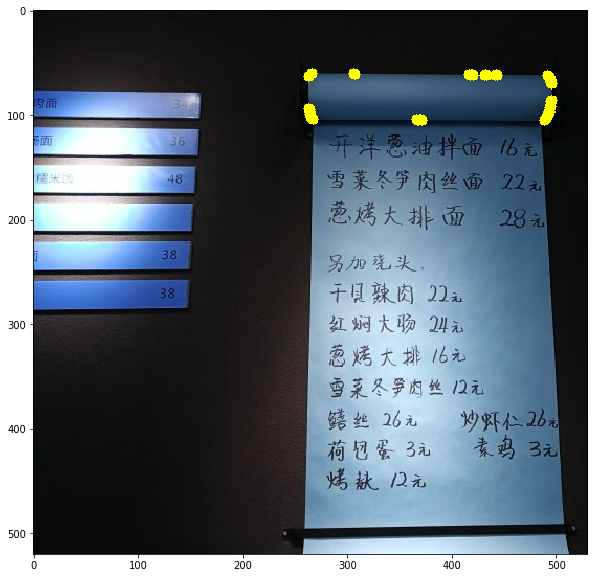

In [132]:
imge=cv2.drawContours(orig,(cnts[1]).astype(int),-1,(255,255,0),10) #画出轮廓
plt.imshow(imge)

In [97]:
edged

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [30]:
import cv2
import numpy as np
import operator
import collections
import math
import sys
import os

size=1024       #converts input image into dimension size*size

def draw_plane(min,max,stride,dim):         #draws protector from angle "min" to "max" with difference of stride and on size (dim*dim)
    img = np.zeros((dim, dim, 3), np.uint8)
    img[:, :, :] = (255, 255, 255)
    j=0
    i=min
    while(i<=max):
        x = float(size/2) / np.tan(np.deg2rad(i))
        cv2.line(img, (int(size/2.0 + x), 0), (size/2, size/2), (0, 0, 0), 1)

        if j%3==0 and i<90:
            cv2.putText(img, "+"+str(90-i), (int(size/2.0+x-40), 0+30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, 255, 1)
        if j%3==0 and i>90:
            cv2.putText(img, "-"+str(i-90), (int(size/2.0+x), 0+30), cv2.FONT_HERSHEY_SIMPLEX, 0.6, 255, 1)
        j+=1
        i = i + stride
    return img

def rotateImage(image, angle):              #rotate image with "angle"
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

def rotate(image,angle):                    #merge rotated image with a white background to avoid cropping
    s_image=rotateImage(image,angle)

    l_image = np.zeros((size, size, 3), np.uint8)

    l_image[:,:,:]=(255,255,255)

    finalimg=l_image+s_image
    return finalimg

def find_Angle(img_str):                       #correct skew from -45 to 45 degree
    img1 = cv2.imread(str(img_str))

    img1 = cv2.resize(img1, (size, size))
    img = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

    img = cv2.bilateralFilter(img, 9, 75, 75)
    img = cv2.Canny(img, 100,200, apertureSize=5, L2gradient=True)

    img_b = draw_plane(45, 135, 5, size)

    # cv2.imshow('szxv', img)
    # cv2.waitKey(0)

    kernel = np.ones((3, 3), np.uint8)
    img = cv2.dilate(img, kernel, 1)



    lines = cv2.HoughLinesP(img, 1, np.pi / 180, 30, minLineLength=20)


    allAngle = []
    for i in range(len(lines)):
        for x1, y1, x2, y2 in lines[i]:
            cv2.line(img, (x1, y1), (x2, y2), (0, 255, 255), 1)
            angle = (y1 - y2) / float(x2 - x1)
            angle = np.rad2deg(np.arctan(angle))
            if angle >= -45 and angle <= 45:
                allAngle.append(angle)


    img2 = img1
    cv2.line(img2, (size / 2, 0), (size / 2, size), (255, 0, 127), 4)
    cv2.line(img2, (0, size/2), (size, size/2), (0, 0, 127), 4)
    comb_img = cv2.bitwise_and(img2, img_b)

    # cv2.imshow('Original Image', comb_img)            #shows the original image
    # cv2.waitKey(0)

    degree_bin = 3
    bin = []
    for i in range(int(90 / degree_bin) + 1):
        bin.append(-45 + i * degree_bin)


    hist, bins = np.histogram(allAngle, bin)

    maxi = [i for i, j in enumerate(hist) if j == max(hist)]

    if bins[maxi][0] >= 0:
        blah = 1
    else:
        blah = 2

    finalAngle = []
    for ang in allAngle:
        if ang >= bins[maxi[0] - 1] and ang < bins[maxi[0]] and blah == 2:
            finalAngle.append(ang)
        if ang >= bins[maxi[0]] and ang < bins[maxi[0] + 1]:
            finalAngle.append(ang)
        if ang > bins[maxi[0] + 1] and ang <= bins[maxi[0] + 2] and blah == 1:
            finalAngle.append(ang)


    ans = np.mean(finalAngle)


    img_final = rotate(img2, -1 * ans)
    img_final = cv2.resize(img_final, (size, size))

    img_final = cv2.bitwise_and(img_final, img_b)

    cv2.line(img_final, (int(size / 2.0), 0), (size / 2, size), (0, 0, 255), 3)
    cv2.line(img_final, (0, size / 2), (size, size / 2), (0, 255, 0), 3)
    cv2.ellipse(img_final, (size / 2, size / 2), (200, 200), 0, 270, 270 + ans, 255, 3)
    cv2.putText(img_final, str(ans), (int(size * 2 / 3.0), int(size / 2.0)), cv2.FONT_HERSHEY_SIMPLEX, 0.75, 255, 3)

    i = 0
    while (i < size):
        cv2.line(img_final, (0, i), (size, i), (0, 255, 0), 1)
        i += 32
    # cv2.imshow('sdvzv', img_final)            #show skew corrected image with angle
    # cv2.waitKey(0)

    vis = np.concatenate((comb_img, img_final), axis=1)
    nam=os.path.join('results/',str(img_str))
    # print nam
    # cv2.imwrite(nam,vis)
    # cv2.waitKey(0)
    # vis=cv2.resize(vis,(1300,600))
    # cv2.imshow('sdvnjvn',vis)
    # cv2.waitKey(0)
    cv2.destroyAllWindows()
    return -1*ans

In [32]:
angle=find_Angle("/Users/luoweimeng/Documents/较符合要求的图片/2.jpg")
print(angle)

-2.2842700805669263


/Users/luoweimeng/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:70: RuntimeWarning: divide by zero encountered in divide
